## Classification Models

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [150]:
df = pd.read_csv('./oversampled_health_outcomes.csv')
df.head()


,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,perc_smoker,hiv_tested,perc_no_healthins,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,Total_MetGoals,MetGoal_Reached
0,Clinton,38632.0,-1.5,19.5,27.3,6.8,68.8,8.8,82.9,52.5,...,21.0,33.0,8.0,36.0,89.0,0.6,27.9,19.0,2.0,1
1,Tioga,40591.0,-3.3,19.6,33.1,5.7,77.9,7.4,79.9,58.5,...,21.0,33.0,8.0,36.0,89.0,0.6,58.4,35.4,1.0,1
2,Warren,39191.0,-6.3,19.1,33.4,7.5,74.3,10.4,77.7,66.6,...,27.0,35.0,10.0,41.0,86.0,2.6,11.9,82.6,0.0,0
3,Wyoming,26794.0,-5.2,19.4,32.4,7.4,71.2,10.6,76.9,56.8,...,24.0,45.0,11.0,29.0,89.0,0.4,20.8,12.2,2.0,1
4,Potter,16526.0,-5.3,20.3,35.9,6.2,77.8,11.3,78.7,68.9,...,21.0,33.0,8.0,36.0,89.0,1.5,49.2,91.8,2.0,1


In [130]:
df['MetGoal_Reached'].value_counts()

1    116
0    111
Name: MetGoal_Reached, dtype: int64

In [149]:
df['Total_MetGoals'].value_counts()

0.0    111
2.0     44
1.0     39
3.0     20
5.0      6
4.0      5
6.0      2
Name: Total_MetGoals, dtype: int64

## KNN Classifier

In [135]:
data = df.columns[1:-2]
target = df.columns[-1]

In [136]:
X = df[data]
y = df[target]
y=y.astype('int')


# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
  
X = imputer.transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=60)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)                                    
print(knn.predict(X_test))

[0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]


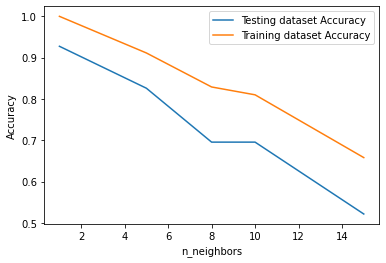

In [148]:
neighbors = [1, 5, 8, 10, 15]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Cluster Plots

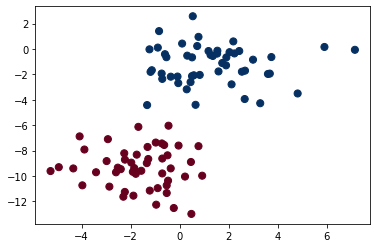

In [139]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [141]:
norm = StandardScaler().fit(X_train)

## Do cross-val --> test different hyperparameters: C values, try L1 & L2 norms
logreg = LogisticRegression(max_iter=5000)
logreg.fit(norm.transform(X_train), y_train)
logreg.score(norm.transform(X_train), y_train)

0.9810126582278481

## Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
# using only binary
## test hyperparameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9710144927536232

In [ ]:
## expand possible classifications
rf2 = RandomForestClassifier()
